In [31]:
from numpy import *
import numpy as np

In [39]:
def loadDataSet(fileName,delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float , line)) for line in stringArr]
    return np.array(datArr)

In [63]:
def pca(dataMat , topNfeat=99999):
    meanVals = np.mean(dataMat,axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved , rowvar=0)
    eigVals , eigVects = np.linalg.eig(np.mat(covMat))
    eigValInd = np.argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:,eigValInd]
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat,reconMat

In [69]:
dataMat = loadDataSet('testSet.txt')
lowDMat , reconMat = pca(dataMat , 1)
lowDMat2 , reconMat2 = pca(dataMat , 2)

In [70]:
shape(dataMat) , lowDMat.shape , reconMat.shape

((1000, 2), (1000, 1), (1000, 2))

In [71]:
import matplotlib.pyplot as plt

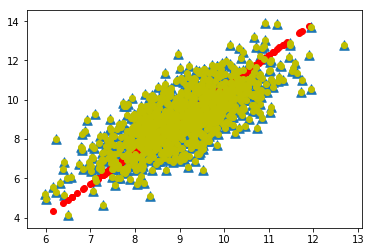

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten(),dataMat[:,1].flatten(),marker='^',s=90)
ax.scatter(reconMat[:,0].A.flatten(),reconMat[:,1].A.flatten(),marker='o',c='red')
ax.scatter(reconMat2[:,0].A.flatten(),reconMat2[:,1].A.flatten(),marker='o',c='y')
plt.show()

In [57]:
reconMat[:,0].A.flatten()

array([9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393644,
       9.06393644, 9.06393644, 9.06393644, 9.06393644, 9.06393

In [87]:
def replaceNanWithMean():
    dataMat = np.mat(loadDataSet('secom.data',' '))
    numFeat = shape(dataMat)[1]
    for i in range(numFeat):
        meanVal = np.mean(dataMat[np.nonzero(~isnan(dataMat[:,i].A))[0],i])
        dataMat[np.nonzero(isnan(dataMat[:,i].A))[0],i] = meanVal
    return dataMat

In [91]:
dataMat = replaceNanWithMean()

In [93]:
meanVals = np.mean(dataMat,axis=0)
meanRemoved = dataMat - meanVals
covMat = np.cov(meanRemoved,rowvar=0)
eigVals , eigVects = np.linalg.eig(covMat)

In [100]:
covMat.shape

(590, 590)